<a href="https://colab.research.google.com/github/WilliamR312/pourmoi/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERWIN Data Modeler

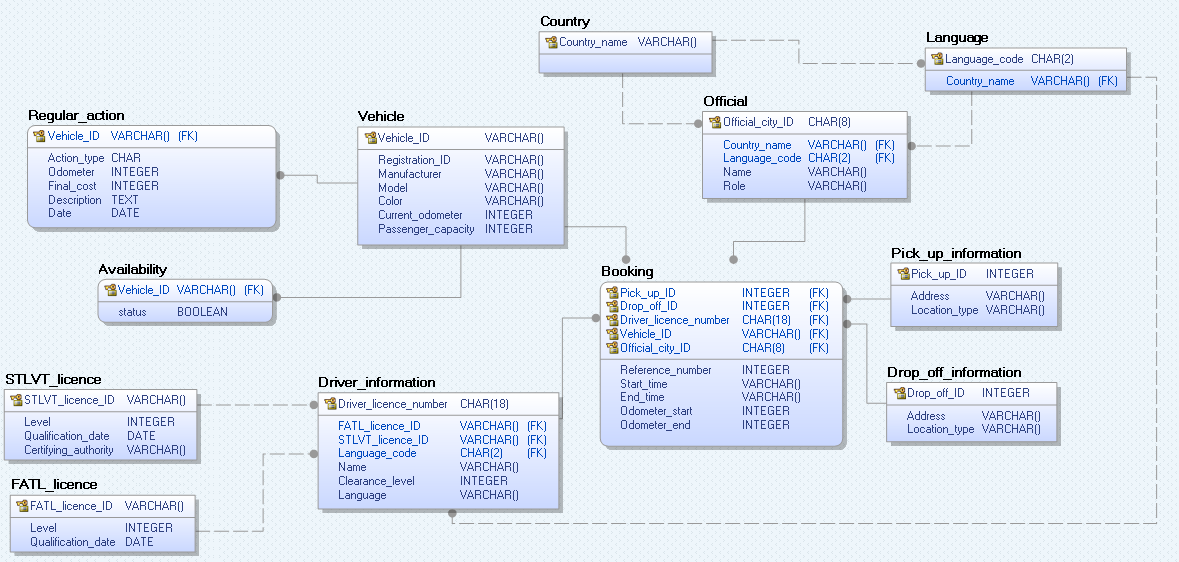

**First, I create my Database**

In [227]:
from sqlalchemy import create_engine
my_conn = create_engine('sqlite:////content/midterm_william_rech.db')

**Vehicle**

The structure of the vehicles is identical to the subject. Each Vehicle_ID are unique.


In [228]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Vehicle`(
  `Vehicle_ID` VARCHAR,
  `Registration_ID` VARCHAR,
  `Manufacturer` VARCHAR,
  `Model` VARCHAR,
  `Color` VARCHAR,
  `Odometer` INT,
  `Passenger_capacity` INT,
  PRIMARY KEY(`Vehicle_ID`)
); ''')

In [229]:
my_conn.execute(''' INSERT OR REPLACE INTO 'Vehicle'
('Vehicle_ID', 'Registration_ID', 'Manufacturer', 'Model', 'Color', 'Odometer', 'Passenger_capacity') VALUES
('V1000', 'Volvo', '2001ABC', 'XC90 SE', 'Silver', 4350, 4),
('V1001', 'Kia', '2006AFD', 'K7', 'White', 2195, 4),
('V1002', 'Tesla', '2021AHR', '2020 F', 'White', 509, 4),
('V1003', 'Ford', '2020DXF', 'Transit', 'Silver', 974, 2); ''')

In [230]:
r_set=my_conn.execute(''' SELECT * from 'Vehicle' ''');
for row in r_set:
  print(row)

('V1000', 'Volvo', '2001ABC', 'XC90 SE', 'Silver', 4350, 4)
('V1001', 'Kia', '2006AFD', 'K7', 'White', 2195, 4)
('V1002', 'Tesla', '2021AHR', '2020 F', 'White', 509, 4)
('V1003', 'Ford', '2020DXF', 'Transit', 'Silver', 974, 2)


**Availability**

I store the available vehicles. An availability status is linked to a Vehicle through the vehicle_ID.

In [231]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS`Availability`(
`Availability` BOOLEAN,
`Vehicle_ID` VARCHAR,
  PRIMARY KEY(`Availability`)
  FOREIGN KEY (`Vehicle_ID`) 
  REFERENCES `Vehicle` (`Vehicle_ID`)
);''')

In [232]:
my_conn.execute(''' INSERT OR REPLACE INTO 'Availability'
('Availability','Vehicle_ID') VALUES
  (0,'V1000'),
  (0,'V1001'),
  (1,'V1002'),
  (1,'V1003');
''')

In [233]:
r_set=my_conn.execute(''' SELECT * from 'Availability' ''');
for row in r_set:
  print(row)

(0, 'V1001')
(1, 'V1003')


**Regular Action**

A regular action is linked to a vehicle with its vehicle_ID attribute.

In [234]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Regular_action`(
  `Action_type` CHAR(1),
  `Odometer` INT,
  `Final_cost` INT,
  `Description` TEXT,
  `Date` DATE,
  `Vehicle_ID` VARCHAR,
  FOREIGN KEY (`Vehicle_ID`) 
  REFERENCES `Vehicle` (`Vehicle_ID`),
  CONSTRAINT Check_action_type CHECK (Action_type='M' OR Action_type='R')
); ''')

In [235]:
my_conn.execute('''INSERT OR REPLACE INTO 'Regular_action'
('Action_type', 'Odometer', 'Final_Cost', 'Date', 'Description','Vehicle_ID') VALUES
  ('M', 100, 1000, '2000-10-10', 'aaa','2001ABC'),
  ('M', 100, 1000, '2000-10-10', 'aaa','2006AFD'),
  ('R', 100, 1000, '2000-10-10', 'aaa','2021AHR'),
  ('R', 100, 1000, '2000-10-10', 'aaa','2020DXF');
''')

In [236]:
r_set=my_conn.execute('''SELECT * from 'Regular_action' ''');
for row in r_set:
  print(row)

('M', 100, 1000, 'aaa', '2000-10-10', '2001ABC')
('M', 100, 1000, 'aaa', '2000-10-10', '2006AFD')
('R', 100, 1000, 'aaa', '2000-10-10', '2021AHR')
('R', 100, 1000, 'aaa', '2000-10-10', '2020DXF')
('M', 100, 1000, 'aaa', '2000-10-10', '2001ABC')
('M', 100, 1000, 'aaa', '2000-10-10', '2006AFD')
('R', 100, 1000, 'aaa', '2000-10-10', '2021AHR')
('R', 100, 1000, 'aaa', '2000-10-10', '2020DXF')


**Language**

In [237]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Language`
  (`Language_code` CHAR(2), PRIMARY KEY(`Language_code`));
''')

In [238]:
my_conn.execute('''INSERT OR REPLACE INTO 'Language' ('Language_code') VALUES
  ('EN'),
  ('KR'),
  ('TW'),
  ('JP'),
  ('CN');
''')

In [239]:
r_set=my_conn.execute('''SELECT * from 'Language' ''');
for row in r_set:
  print(row)

('EN',)
('KR',)
('TW',)
('JP',)
('CN',)


**Country**

In [240]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Country`(
  `Country` VARCHAR, 
  `Language_code` VARCHAR, 
  PRIMARY KEY(`Country`)
  FOREIGN KEY (`Language_code`)
  REFERENCES `Language` (`Language_code`)
);''')

In [241]:
my_conn.execute('''INSERT OR REPLACE INTO 'Country'
  ('Country','Language_code') VALUES
  ('Korea','KR, EN'),
  ('Taiwan','TW, EN'),
  ('Japan','JP, EN');
''')

In [242]:
r_set=my_conn.execute('''SELECT * from 'Country' ''');
for row in r_set:
  print(row)

('Korea', 'KR, EN')
('Taiwan', 'TW, EN')
('Japan', 'JP, EN')


**Driver Licence**

The driver licenses contain STLVT and FATL licenses.
This license also contains the driver's information (such as languages spoken).

In [243]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Driver_information`(
  `Language_code` VARCHAR,
  `Name` VARCHAR,
  `Clearance_level` INT,
  `Driver_licence_number` VARCHAR,
  'FATL_licence_ID' VARCHAR,
  'STLVT_licence_ID' VARCHAR,
  FOREIGN KEY (`Language_code`)
  REFERENCES `Language` (`Language_code`)
  FOREIGN KEY (`FATL_licence_ID`)
  REFERENCES `FATL_licence` (`FATL_licence_ID`)
  FOREIGN KEY (`STLVT_licence_ID`)
  REFERENCES `STLVT_licence` (`STLVT_licence_ID`)
);''')

In [244]:
my_conn.execute(''' INSERT OR REPLACE INTO 'Driver_information'
('Language_code', 'Name', 'Clearance_level', 'Driver_licence_number', 'FATL_licence_ID', 'STLVT_licence_ID') VALUES
  ('KR, EN', 'Aa A', 0, 'AAA', 'FATL000', 'STLVT000'),
  ('KR, TW', 'Bb B', 1, 'BBB', 'FATL001', 'STLVT001'),
  ('KR, JP', 'Cc C', 2, 'CCC', 'FATL002', 'STLVT002');
''')

In [245]:
r_set=my_conn.execute('''SELECT * from 'Driver_information' ''');
for row in r_set:
  print(row)

('KR, EN', 'Aa A', 0, 'AAA', 'FATL000', 'STLVT000')
('KR, TW', 'Bb B', 1, 'BBB', 'FATL001', 'STLVT001')
('KR, JP', 'Cc C', 2, 'CCC', 'FATL002', 'STLVT002')
('KR, EN', 'Aa A', 0, 'AAA', 'FATL000', 'STLVT000')
('KR, TW', 'Bb B', 1, 'BBB', 'FATL001', 'STLVT001')
('KR, JP', 'Cc C', 2, 'CCC', 'FATL002', 'STLVT002')


**STLVT**

In [246]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `STLVT`(
  `Level` INT,
  `Qualification_date` VARCHAR,
  `Certifying_authority` VARCHAR,
  `STLVT_licence_ID` VARCHAR,
  PRIMARY KEY (`STLVT_licence_ID`)
  CONSTRAINT checking_level CHECK ((Level >= 1) AND (Level <= 5))
); ''')

In [247]:
my_conn.execute(''' INSERT OR REPLACE INTO 'STLVT'
  ('Level','Qualification_date','Certifying_authority','STLVT_licence_ID') VALUES
  (1,'2010-10-10','Local Police Station','STLVT001'),
  (2,'2015-05-15','Foreign Police Station','STLVT002'),
  (3,'2000-01-01','Army','STLVT000');
''')

In [248]:
r_set=my_conn.execute(''' SELECT * from 'STLVT' ''');
for row in r_set:
  print(row)

(1, '2010-10-10', 'Local Police Station', 'STLVT001')
(2, '2015-05-15', 'Foreign Police Station', 'STLVT002')
(3, '2000-01-01', 'Army', 'STLVT000')


**FATL**

In [249]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `FATL`(
  `Level` INT, 
  `Qualification_date` DATE,
  `FATL_licence_ID` VARCHAR,
    PRIMARY KEY (`FATL_licence_ID`)
    CONSTRAINT Check_level CHECK ((Level >= 1) AND (Level <= 10))
); ''')

In [250]:
my_conn.execute('''INSERT OR REPLACE INTO 'FATL'
  ('Level','Qualification_date','FATL_licence_ID') VALUES
  (1,'2010-10-10','FATL000'),
  (2,'2012-10-10','FATL001');
''')

In [251]:
r_set=my_conn.execute(''' SELECT * from 'FATL' ''');
for row in r_set:
  print(row)

(1, '2010-10-10', 'FATL000')
(2, '2012-10-10', 'FATL001')


**Pick up information**

Contains the address and the location type.

In [252]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Pick_up_information` (
  `Pick_up_ID` VARCHAR,
  `Adress` VARCHAR,
  `Location_type` VARCHAR,
  PRIMARY KEY (`Pick_up_ID`) 
);''')

**Drop off information**

Contains the address and the location type.

In [253]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Drop_off_information` (
  `Drop_off_ID` VARCHAR,
  `Adress` VARCHAR,
  `Location_type` VARCHAR,
  PRIMARY KEY (`Drop_off_ID`) 
);''')

**Booking**

In [254]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Booking`(
  'Pick_up_ID' VARCHAR,
  'Drop_off_ID' VARCHAR,
  'Driver_licence_number' VARCHAR,
  `Vehicle_ID` VARCHAR,
  `Official_city_ID` VARCHAR,
  `Reference_number` INT,
  'Start_time' VARCHAR,
  'End_time' VARCHAR,
  'Odometer_start' INT,
  'Odometer_end' INT,
  FOREIGN KEY (`Pick_up_ID`) 
  REFERENCES `Pick_up_information` (`Pick_up_ID`)
  FOREIGN KEY (`Drop_off_ID`) 
  REFERENCES `Drop_off_information` (`Drop_off_ID`)
); ''')

**Official**

In [255]:
r_set=my_conn.execute(''' CREATE TABLE IF NOT EXISTS `Official`(
  'Official_city_ID' CHAR(8),
  `Country` VARCHAR,
  `Language_code` CHAR(2),
  `Name` VARCHAR,
  `Role` VARCHAR,
  PRIMARY KEY(`Official_city_ID`)
  FOREIGN KEY (`Language_code`)
  REFERENCES `Language` (`Language_code`)
  FOREIGN KEY (`Country`) 
  REFERENCES `Country` (`Country`)
); ''')